In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity
from transformers import BertTokenizer, BertModel
import torch

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to get BERT embeddings for a sentence
def get_embedding(sentence):
    inputs = tokenizer(sentence, return_tensors='pt', truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# Sentences
sentences = ["playing football", "playing basketball", "reading a book"]
embeddings = np.array([get_embedding(sentence) for sentence in sentences])

euclidean_dist = euclidean_distances(embeddings)
cosine_sim = cosine_similarity(embeddings)


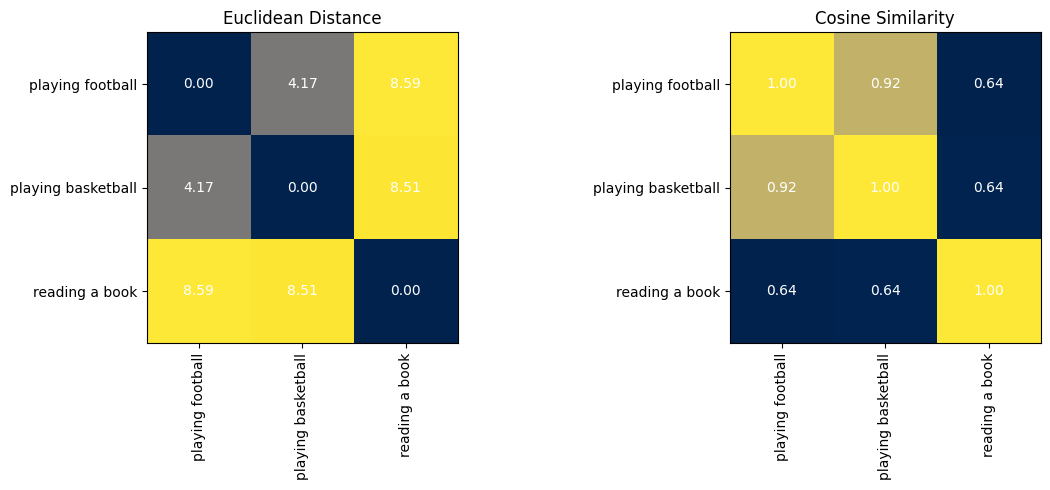

In [9]:
# Plot Euclidean distances
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].imshow(euclidean_dist, cmap='cividis')
ax[0].set_xticks(range(len(sentences)))
ax[0].set_yticks(range(len(sentences)))
ax[0].set_xticklabels(sentences, rotation=90)
ax[0].set_yticklabels(sentences)
ax[0].set_title('Euclidean Distance')
for (i, j), val in np.ndenumerate(euclidean_dist):
    ax[0].text(j, i, f'{val:.2f}', ha='center', va='center', color='white')

# Plot Cosine similarities
ax[1].imshow(cosine_sim, cmap='cividis')
ax[1].set_xticks(range(len(sentences)))
ax[1].set_yticks(range(len(sentences)))
ax[1].set_xticklabels(sentences, rotation=90)
ax[1].set_yticklabels(sentences)
ax[1].set_title('Cosine Similarity')
for (i, j), val in np.ndenumerate(cosine_sim):
    ax[1].text(j, i, f'{val:.2f}', ha='center', va='center', color='white')

plt.tight_layout()
plt.show()

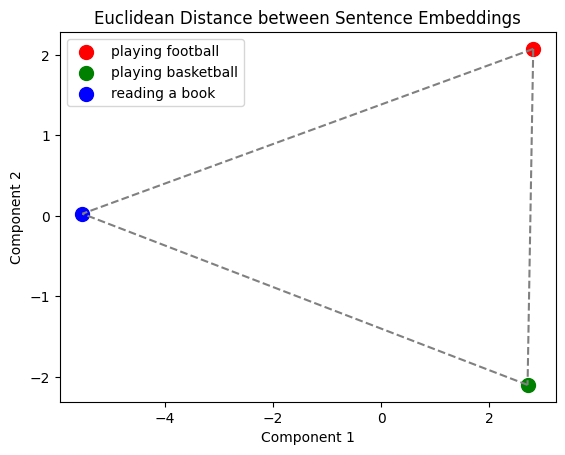

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from transformers import BertTokenizer, BertModel
import torch

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Plot in 2D
fig, ax = plt.subplots()

# Plot points
colors = ['r', 'g', 'b']
for i in range(len(sentences)):
    ax.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1], color=colors[i], s=100, label=sentences[i])



# Draw lines to indicate Euclidean distances
for i in range(len(sentences)):
    for j in range(i + 1, len(sentences)):
        ax.plot([reduced_embeddings[i, 0], reduced_embeddings[j, 0]],
                [reduced_embeddings[i, 1], reduced_embeddings[j, 1]], linestyle='--', color='gray')

# Set axis labels
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')

# Title
ax.set_title('Euclidean Distance between Sentence Embeddings')

# Add legend
ax.legend()

plt.show()

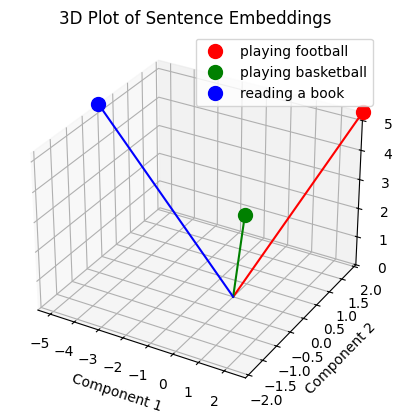

In [16]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Reduce dimensions to 3D using PCA
pca = PCA(n_components=3)
reduced_embeddings = pca.fit_transform(embeddings)

# Function to calculate the angle between two vectors
def angle_between(v1, v2):
    cos_theta = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
    angle = np.arccos(np.clip(cos_theta, -1.0, 1.0))
    return np.degrees(angle)

# Plot in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot points
colors = ['r', 'g', 'b']
labels = sentences
for i in range(len(sentences)):
    ax.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1], reduced_embeddings[i, 2], color=colors[i], s=100, label=labels[i])
    # Plot vectors from origin
    ax.plot([0, reduced_embeddings[i, 0]], [0, reduced_embeddings[i, 1]], [0, reduced_embeddings[i, 2]], color=colors[i])



# Set axis labels
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

# Set limits to include the origin
ax.set_xlim([min(reduced_embeddings[:, 0].min(), 0), reduced_embeddings[:, 0].max()])
ax.set_ylim([min(reduced_embeddings[:, 1].min(), 0), reduced_embeddings[:, 1].max()])
ax.set_zlim([min(reduced_embeddings[:, 2].min(), 0), reduced_embeddings[:, 2].max()])

# Title
ax.set_title('3D Plot of Sentence Embeddings')

# Add legend
ax.legend()

plt.show()
